<a href="https://colab.research.google.com/github/harshitha3506/machine-learning/blob/main/titanicds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1-4 titanic

In [ ]:
https://tinyurl.com/ML-2025-26

In [4]:
import pandas as pd

train = pd.read_csv('/content/titanic_train (1).csv')
test = pd.read_csv('/content/titanic_test (1).csv')

# Drop target column from test if present
test.drop(columns=['Survived'], errors='ignore', inplace=True)

# Combine datasets along rows
combined = pd.concat([train, test], axis=0, ignore_index=True)


In [5]:
combined.info()
combined.describe()
combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#add flags if needed
combined['Age_missing'] = combined['Age'].isnull().astype(int)
combined['Fare_missing'] = combined['Fare'].isnull().astype(int)

In [7]:
#fill missing values
combined['Age'].fillna(combined['Age'].median(), inplace=True)
combined['Fare'].fillna(combined['Fare'].median(), inplace=True)
combined['Embarked'].fillna(combined['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-2442812532.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined['Age'].fillna(combined['Age'].median(), inplace=True)
/tmp/ipython-input-2442812532.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [8]:
#encode categorical features
combined = pd.get_dummies(combined, columns=['Sex', 'Embarked'], drop_first=True)


In [9]:
#scale numerica for mi etc
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
combined[['Age', 'Fare']] = scaler.fit_transform(combined[['Age', 'Fare']])


In [10]:
#split combined to train and test again
train_processed = combined.iloc[:len(train)]
test_processed = combined.iloc[len(train):]


In [11]:
#Now you can separate X and y for train
X = train_processed.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')
y = train_processed['Survived']

feature selection filtermethods

In [12]:
#constantfeatures
from sklearn.feature_selection import VarianceThreshold

# VarianceThreshold with 0 variance removes constant features
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X)

constant_features = X.columns[~constant_filter.get_support()]
print("Constant features:", list(constant_features))


Constant features: ['Fare_missing']


In [13]:
#quasi constant features
# Remove features where > 99% of values are same
quasi_constant_filter = VarianceThreshold(threshold=0.01)  # keep features with >1% variance
quasi_constant_filter.fit(X)

quasi_constant_features = X.columns[~quasi_constant_filter.get_support()]
print("Quasi-constant features:", list(quasi_constant_features))


Quasi-constant features: ['Fare_missing']


In [14]:
#duplicate
duplicate_features = X.columns[X.T.duplicated()]
print("Duplicate features:", list(duplicate_features))


Duplicate features: []


In [15]:
#correlation
import numpy as np

corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

correlated_features = [col for col in upper.columns if any(upper[col] > 0.9)]
print("Highly correlated features to drop:", correlated_features)


Highly correlated features to drop: []


In [16]:
#mutual information
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("Mutual information scores:\n", mi_series)


Mutual information scores:
 Sex_male        0.149756
Fare            0.135927
SibSp           0.046509
Pclass          0.024037
Age             0.021554
Parch           0.012999
Embarked_S      0.004541
Age_missing     0.000000
Fare_missing    0.000000
Embarked_Q      0.000000
dtype: float64


In [17]:
#chi2
import pandas as pd

from sklearn.feature_selection import SelectKBest, chi2

# Copy X to avoid changing original
X_chi = X.copy()

# Fill missing values with 0
X_chi = X_chi.fillna(0)

# One-hot encode categorical features
X_chi = pd.get_dummies(X_chi, drop_first=True)

# Ensure all values are non-negative (required for chi2)
X_chi = X_chi.apply(lambda col: col - col.min() if (col < 0).any() else col)

# Apply Chi-square
chi_selector = SelectKBest(score_func=chi2, k='all')
chi_selector.fit(X_chi, y)

# Get scores as Series
chi_scores = pd.Series(chi_selector.scores_, index=X_chi.columns).sort_values(ascending=False)
p_values = pd.Series(chi_selector.pvalues_, index=X_chi.columns).sort_values()

print("Chi-square scores:\n", chi_scores)
print("\nP-values:\n", p_values)


Chi-square scores:
 Sex_male        92.702447
Fare            87.358232
Pclass          30.873699
Parch           10.097499
Age_missing      6.069142
Embarked_S       5.489205
SibSp            2.581865
Age              1.702543
Embarked_Q       0.010847
Fare_missing          NaN
dtype: float64

P-values:
 Sex_male        6.077838e-22
Fare            9.054250e-21
Pclass          2.753786e-08
Parch           1.484707e-03
Age_missing     1.375638e-02
Embarked_S      1.913424e-02
SibSp           1.080942e-01
Age             1.919557e-01
Embarked_Q      9.170520e-01
Fare_missing             NaN
dtype: float64


In [18]:
#anova
from sklearn.feature_selection import SelectKBest, f_classif

anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(X, y)

anova_scores = pd.Series(anova_selector.scores_, index=X.columns).sort_values(ascending=False)
print("ANOVA F-test scores:\n", anova_scores)


ANOVA F-test scores:
 Sex_male        372.405724
Pclass          115.031272
Fare             63.030764
Embarked_S       20.374460
Age_missing       7.621461
Parch             5.963464
Age               3.761528
SibSp             1.110572
Embarked_Q        0.011846
Fare_missing           NaN
dtype: float64


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [6] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [19]:
#auc-roc
from sklearn.metrics import roc_auc_score

auc_scores = {}
for col in X.columns:
    try:
        auc = roc_auc_score(y, X[col])
        auc_scores[col] = auc
    except:
        continue

auc_series = pd.Series(auc_scores).sort_values(ascending=False)
print("Univariate AUC-ROC scores:\n", auc_series)



Univariate AUC-ROC scores:
 Fare            0.692122
Parch           0.561217
SibSp           0.543162
Embarked_Q      0.501055
Fare_missing    0.500000
Age             0.478166
Age_missing     0.462180
Embarked_S      0.431287
Pclass          0.318583
Sex_male        0.233127
dtype: float64


wrapper methods

In [20]:
#forward slection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

selected = []
features = list(X.columns)

while features:
    best_feat, best_score = None, 0
    for feat in features:
        score = np.mean(cross_val_score(LogisticRegression(max_iter=1000), X[selected+[feat]], y, cv=5))
        if score > best_score:
            best_score, best_feat = score, feat
    if best_feat:
        selected.append(best_feat)
        features.remove(best_feat)
    else:
        break

print("Selected features:", selected)


Selected features: ['Sex_male', 'SibSp', 'Pclass', 'Fare_missing', 'Embarked_Q', 'Parch', 'Age_missing', 'Fare', 'Embarked_S', 'Age']


In [21]:
#backward selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np

selected = list(X.columns)

while len(selected) > 1:
    best_score = np.mean(cross_val_score(LogisticRegression(max_iter=1000), X[selected], y, cv=5))
    scores = []
    for feat in selected:
        temp = selected.copy()
        temp.remove(feat)
        score = np.mean(cross_val_score(LogisticRegression(max_iter=1000), X[temp], y, cv=5))
        scores.append((score, feat))
    scores.sort(reverse=True)
    if scores[0][0] >= best_score:
        selected.remove(scores[0][1])
    else:
        break

print("Selected features:", selected)


Selected features: ['Pclass', 'Age', 'Parch', 'Age_missing', 'Sex_male', 'Embarked_Q', 'Embarked_S']


In [22]:
pip install mlxtend


In [23]:
#exhaustive search
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)

efs = EFS(model,
          min_features=1,
          max_features=3,
          scoring='accuracy',
          cv=5)

efs = efs.fit(X, y)

print("Best features:", efs.best_feature_names_)


Features: 175/175

Best features: ('Pclass', 'SibSp', 'Sex_male')


In [24]:
#recurssive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X, y)

print("Selected features:", list(X.columns[rfe.support_]))


Selected features: ['Pclass', 'Age', 'SibSp', 'Sex_male', 'Embarked_S']


embedded methodsL1 (Lasso)	Shrinks some coefficients to 0 → feature is removed
L2 (Ridge)	Shrinks coefficients but doesn’t eliminate features
Elastic Net	Mix of L1 & L2 → balances removal and shrinkage
Random Forest	Uses decision trees to rank feature importance
Decision Tree	Uses splits to decide which features matter most
SVM (Linear)	L1 penalization makes some weights 0 → selects feat

In [25]:
#lasso
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X, y)

coef = pd.Series(model.coef_[0], index=X.columns)
print("Selected by Lasso:", coef[coef != 0].index.tolist())


Selected by Lasso: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_missing', 'Sex_male', 'Embarked_S']


In [26]:
#ridge
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2', solver='liblinear')
model.fit(X, y)

coef = pd.Series(model.coef_[0], index=X.columns)
print("Ridge coefficients:\n", coef)


Ridge coefficients:
 Pclass         -0.907603
Age            -0.448959
SibSp          -0.303707
Parch          -0.087240
Fare            0.176935
Age_missing    -0.307726
Fare_missing    0.000000
Sex_male       -2.490073
Embarked_Q      0.152098
Embarked_S     -0.301108
dtype: float64


In [27]:
#elasticnet
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model.fit(X, y)

coef = pd.Series(model.coef_[0], index=X.columns)
print("Selected by Elastic Net:", coef[coef != 0].index.tolist())


Selected by Elastic Net: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_missing', 'Sex_male', 'Embarked_Q', 'Embarked_S']


In [28]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

imp = pd.Series(model.feature_importances_, index=X.columns)
print("Random Forest importance:\n", imp.sort_values(ascending=False))


Random Forest importance:
 Fare            0.275130
Sex_male        0.254612
Age             0.242922
Pclass          0.092578
SibSp           0.048037
Parch           0.037037
Embarked_S      0.024116
Age_missing     0.015663
Embarked_Q      0.009905
Fare_missing    0.000000
dtype: float64


In [29]:
#decisiontree
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X, y)

imp = pd.Series(model.feature_importances_, index=X.columns)
print("Decision Tree importance:\n", imp.sort_values(ascending=False))


Decision Tree importance:
 Sex_male        0.309335
Fare            0.251092
Age             0.224509
Pclass          0.115598
SibSp           0.050081
Parch           0.026527
Embarked_S      0.012480
Age_missing     0.010164
Embarked_Q      0.000213
Fare_missing    0.000000
dtype: float64


In [30]:
#linearsvm
from sklearn.svm import LinearSVC

model = LinearSVC(penalty='l1', dual=False)
model.fit(X, y)

coef = pd.Series(model.coef_[0], index=X.columns)
print("Selected by SVM:", coef[coef != 0].index.tolist())


Selected by SVM: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Age_missing', 'Sex_male', 'Embarked_Q', 'Embarked_S']


4a Why standardization is necessary:
PCA is based on the variance of features. If features are on different scales (e.g. age in years vs income in dollars), PCA will be biased towards features with larger ranges. Standardizing to mean 0 and variance 1 ensures all features contribute equally.

4.a. Standardize the variables in the dataset

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


4.b. Perform PCA and create a scatter plot with PC1 and PC2

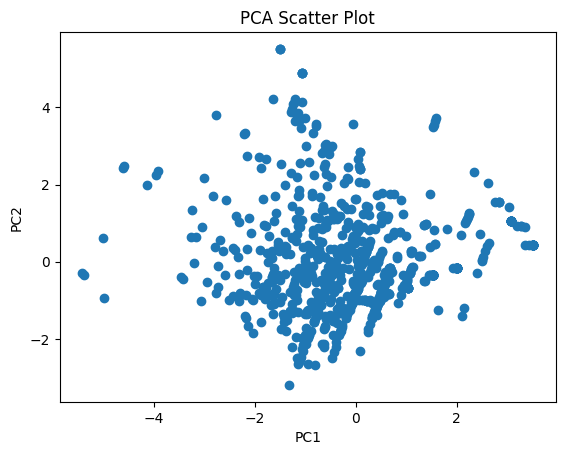

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatter Plot')
plt.show()


4.c. Which variables are most important for PC1 and PC2?

Explanation:
The importance of each original feature for PC1 and PC2 is given by the PCA component loadings (pca.components_). Higher absolute values mean the feature contributes more to that principal component.

In [34]:
import pandas as pd

# Create a DataFrame for component loadings
loadings = pd.DataFrame(pca.components_, columns=X.columns, index=['PC1', 'PC2'])
print("Loadings (importance of variables):\n", loadings)

# Show the top contributing features for each PC
print("\nMost important for PC1:\n", loadings.loc['PC1'].abs().sort_values(ascending=False))
print("\nMost important for PC2:\n", loadings.loc['PC2'].abs().sort_values(ascending=False))


Loadings (importance of variables):
        Pclass       Age     SibSp     Parch      Fare  Age_missing  \
PC1  0.473588 -0.134537 -0.175271 -0.297671 -0.473378     0.387103   
PC2  0.286289 -0.481080  0.537789  0.511390  0.042911     0.105976   

     Fare_missing  Sex_male  Embarked_Q  Embarked_S  
PC1  1.734723e-18  0.202922    0.425263   -0.205728  
PC2 -5.551115e-17 -0.299183    0.163512   -0.080898  

Most important for PC1:
 Pclass          4.735884e-01
Fare            4.733785e-01
Embarked_Q      4.252632e-01
Age_missing     3.871029e-01
Parch           2.976711e-01
Embarked_S      2.057278e-01
Sex_male        2.029220e-01
SibSp           1.752706e-01
Age             1.345372e-01
Fare_missing    1.734723e-18
Name: PC1, dtype: float64

Most important for PC2:
 SibSp           5.377893e-01
Parch           5.113896e-01
Age             4.810804e-01
Sex_male        2.991835e-01
Pclass          2.862886e-01
Embarked_Q      1.635122e-01
Age_missing     1.059758e-01
Embarked_S      8.0

4.d. What percentage of variance is explained by PC1 and PC2?

Explanation:
PCA tells you how much variance is captured by each principal component through explained_variance_ratio_. This helps to understand how much of the original data’s information is preserved.

In [33]:
explained = pca.explained_variance_ratio_
print(f"Variance explained by PC1: {explained[0]*100:.2f}%")
print(f"Variance explained by PC2: {explained[1]*100:.2f}%")


Variance explained by PC1: 21.86%
Variance explained by PC2: 18.99%


4e
 How many PCs explain more than 80% of the total variance?

This question asks: after applying PCA, how many principal components (PCs) do you need so that together they explain at least 80% of the variance in the dataset?

You can answer this by looking at the cumulative explained variance

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA without limiting the number of components
pca = PCA()
pca.fit(X_scaled)

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find how many components explain more than 80% variance
num_components = np.argmax(cumulative_variance >= 0.80) + 1

print(f"Number of PCs explaining more than 80% variance: {num_components}")


Number of PCs explaining more than 80% variance: 6
